** Step - 1 : Import Libraries**

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

**Step - 2 : Load Dataset**

**Context**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [212]:
dataset = pd.read_csv('diabetes.csv')

In [213]:
dataset.head() # top five rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


*Check for missing values*

In [214]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Step - 3 : Convert dataframe into array and extract independent and dependent** 

In [215]:
X = dataset.iloc[:,:-1].values # independent varibles
y = dataset.iloc[:,-1].values # dependent variables

In [216]:
y = y.reshape(-1,1) # coloumn matrix
# y = y.reshape(1,-1) # row matrix

In [217]:
X.shape, y.shape

((768, 8), (768, 1))

** Step -4 : Data Preprocessing **
    - missing values
    - categorical data
    - Feature Scalling

In [218]:
from sklearn.preprocessing import LabelEncoder

In [219]:
label = LabelEncoder()

**Step - 5: Visualizing Correlation**

In [220]:
corr = dataset.corr()

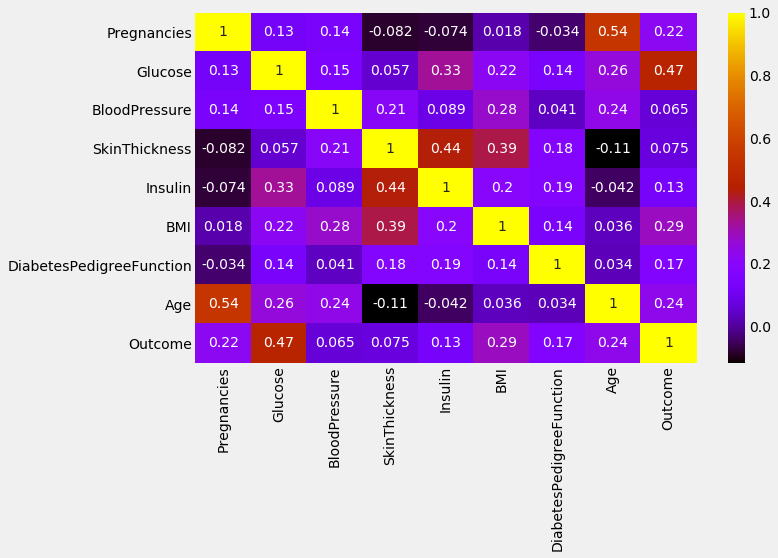

In [221]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot = True, cmap = 'gnuplot')
plt.show()

In [222]:
dataset.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

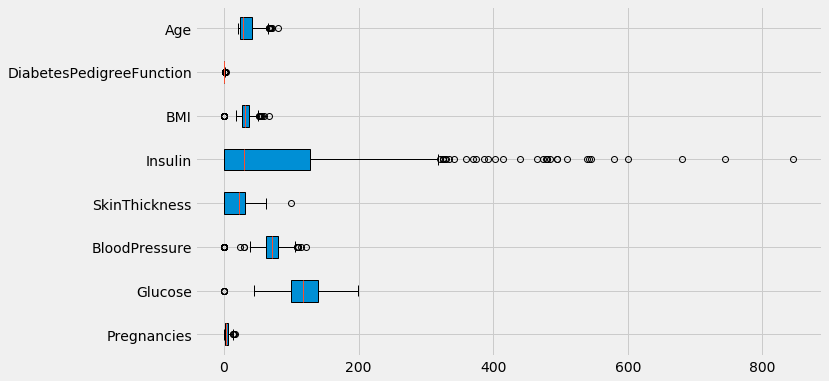

In [223]:
plt.figure(figsize=((10,6)))
plt.boxplot(X, vert=False,patch_artist=True,labels=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])
plt.show()

**Standard Scalling**

In [224]:
from sklearn.preprocessing import MinMaxScaler

In [242]:
sc = MinMaxScaler(feature_range=(0,1))

In [226]:
from sklearn.preprocessing import StandardScaler

In [227]:
sc1 = StandardScaler()

In [243]:
X_new1 = sc.fit_transform(X)

In [246]:
sc.data_max_, sc.data_min_

(array([  17.  ,  199.  ,  122.  ,   99.  ,  846.  ,   67.1 ,    2.42,   81.  ]),
 array([  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.078,  21.   ]))

In [228]:
X_new = sc1.fit_transform(X)

**Elimating Outliers**

In [263]:
X_clean = np.zeros((1,X_new.shape[1]))
y_clean = np.ones((1,1))

for i in range(len(X_new)):
    if X_new[i].max() < 3 and X_new[i].min() > -3:
        
        X_clean = np.append(X_clean,X_new[i:i+1],axis = 0)
        y_clean = np.append(y_clean,y[i:i+1],axis=0)
        
X_clean = X_clean[1:]
y_clean = y_clean[1:]

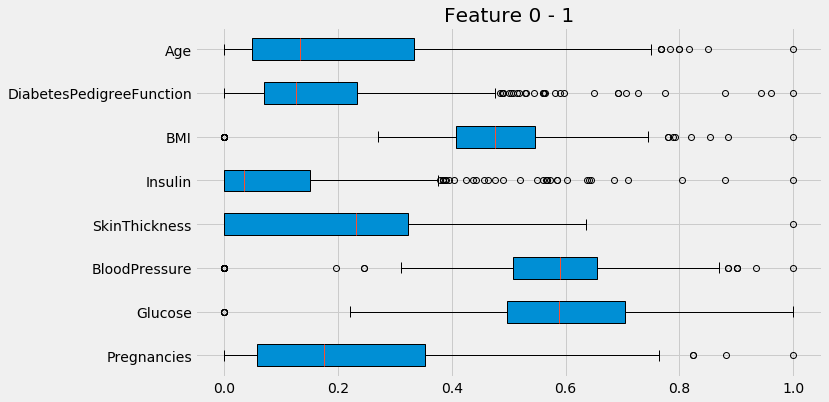

In [264]:
plt.figure(figsize=((10,6)))
plt.boxplot(X_new1, vert=False,patch_artist=True,labels=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])
plt.title('Feature 0 - 1')
plt.show()

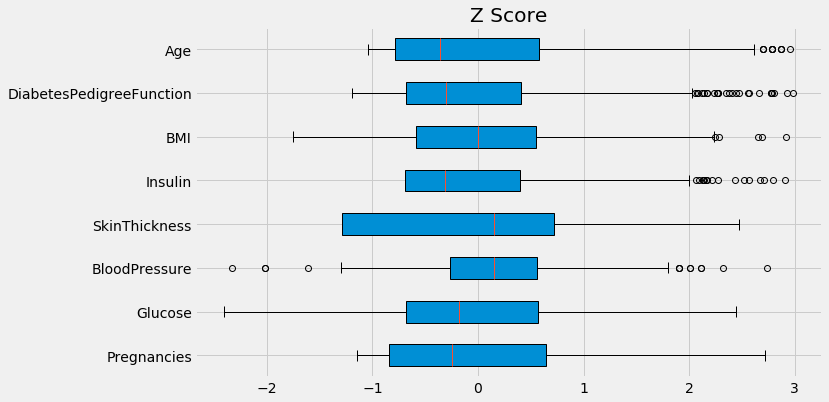

In [265]:
plt.figure(figsize=((10,6)))
plt.boxplot(X_clean, vert=False,patch_artist=True,labels=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])
plt.title('Z Score')
plt.show()

** Step -5 : Spliting data into traning and testing sets**

In [253]:
from sklearn.cross_validation import train_test_split

In [254]:
x_train, x_test, y_train, y_test = train_test_split(X_clean,y_clean,test_size = 0.20)

In [255]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((440, 8), (111, 8), (440, 1), (111, 1))

** Step - 6: K Nearest Neighbour**

In [256]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [257]:
model_log = LogisticRegression(C = 10.0)
model_knn = KNeighborsClassifier(n_neighbors=5)

*traning*

In [258]:
model_log.fit(x_train, y_train) # LOGISTIC REGRESSION 
model_knn.fit(x_train, y_train) # KNN
# predicting with test data
y_pred_log = model_log.predict(x_test) 
y_pred_knn = model_knn.predict(x_test)

C:\Users\srikanth\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srikanth\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


**Step -7 : Evaluating**

In [259]:
from sklearn.metrics import confusion_matrix, classification_report


In [260]:
cm_log = confusion_matrix(y_test, y_pred_log)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Classifiation report 
cr_log = classification_report(y_test, y_pred_log)
cr_knn = classification_report(y_test, y_pred_knn)

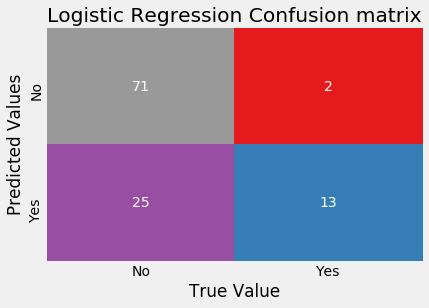

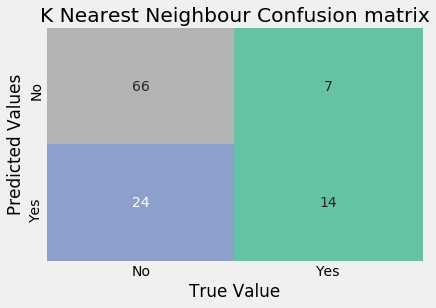

In [261]:
sns.heatmap(cm_log,annot=True,cbar=False,
           xticklabels=['No','Yes'],
           yticklabels=['No','Yes'], cmap = 'Set1')
plt.title('Logistic Regression Confusion matrix')
plt.xlabel('True Value')
plt.ylabel('Predicted Values')
plt.show()

sns.heatmap(cm_knn,annot=True,cbar=False,
           xticklabels=['No','Yes'],
           yticklabels=['No','Yes'], cmap = 'Set2')
plt.title('K Nearest Neighbour Confusion matrix')
plt.xlabel('True Value')
plt.ylabel('Predicted Values')
plt.show()

In [262]:
print('='*20 + 'Logistic Regresion' + '='*20)
print(cr_log)
print('\n')
print('='*20 + 'K Nearest Neighbour' + '='*20)
print(cr_knn)

====================Logistic Regresion====================
             precision    recall  f1-score   support

        0.0       0.74      0.97      0.84        73
        1.0       0.87      0.34      0.49        38

avg / total       0.78      0.76      0.72       111



====================K Nearest Neighbour====================
             precision    recall  f1-score   support

        0.0       0.73      0.90      0.81        73
        1.0       0.67      0.37      0.47        38

avg / total       0.71      0.72      0.70       111

